In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage

class hc:
    def __init__(self):
        self.X = None
        self.linkage_matrix = None
        self.linkage_type = None
        self.metric = None

    def fit(self,X,linkage_type,metric):
        self.X = X
        self.linkage_type = linkage_type
        self.metric = metric
        self.linkage_matrix = linkage(self.X, self.linkage_type, self.metric)
    
    def linkages(self):
        return self.linkage_matrix
    def dendogram(self):
        fig = plt.figure(figsize=(16, 6))
        plt.title("Dendrogram")
        dendrogram(self.linkage_matrix)
        plt.show()

##### HIERARCHICAL CLUSTERING ON HC-DATASET

In [4]:
# Reading the data from the csv file
import pandas as pd
new_customer_data = pd.read_csv('SMAI-Dataset-hc-dataset/new_customers.csv')
# Converting the data into an array
new_customer_data = np.array(new_customer_data)
# removing the first column as it is not required
new_customer_data = new_customer_data[:,1:]
# converting the gender column to numerical values
for i in range(new_customer_data.shape[0]):
    if(new_customer_data[i][0]=="Male"):
        new_customer_data[i][0] = 1
    else:
        new_customer_data[i][0] = 0
# min-max normalizing the data
for i in range(new_customer_data.shape[1]):
    min = np.min(new_customer_data[:,i])
    max = np.max(new_customer_data[:,i])
    new_customer_data[:,i] = (new_customer_data[:,i]-min)/(max-min)

##### Varying Linkages

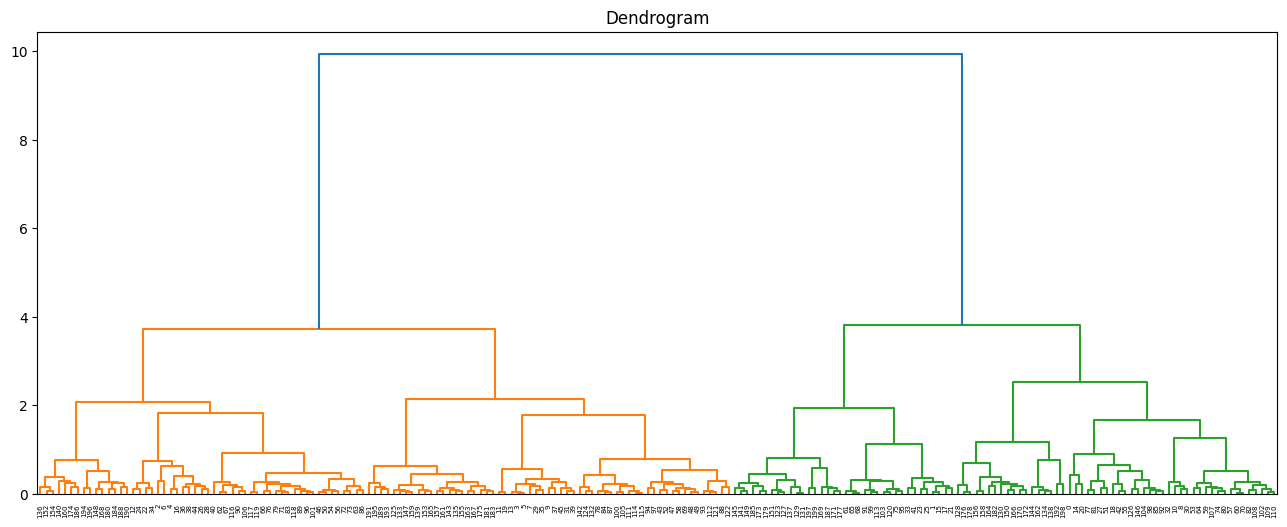

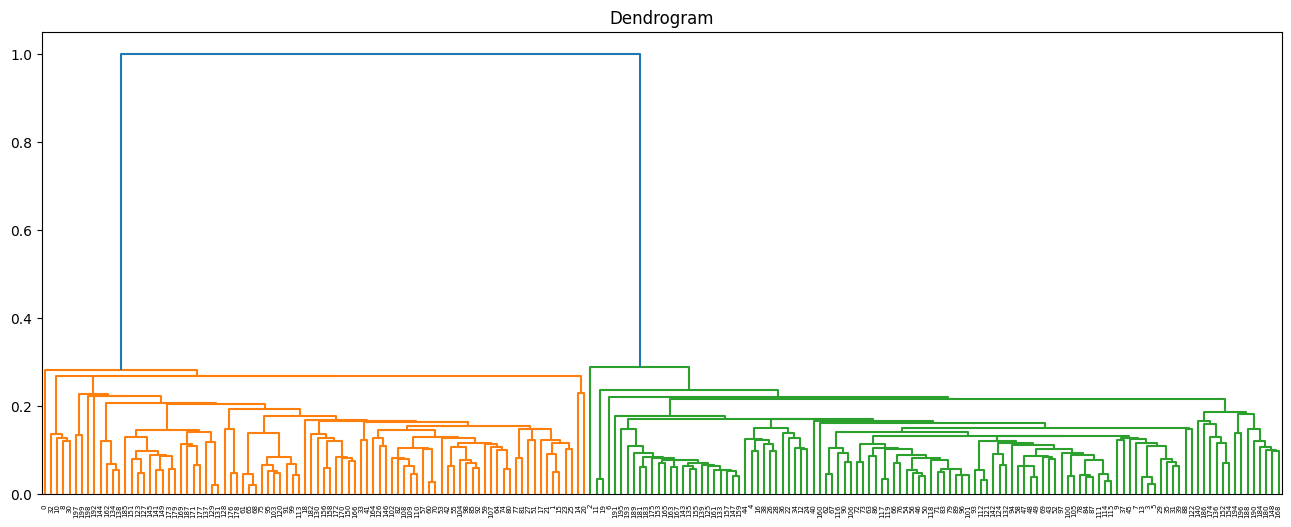

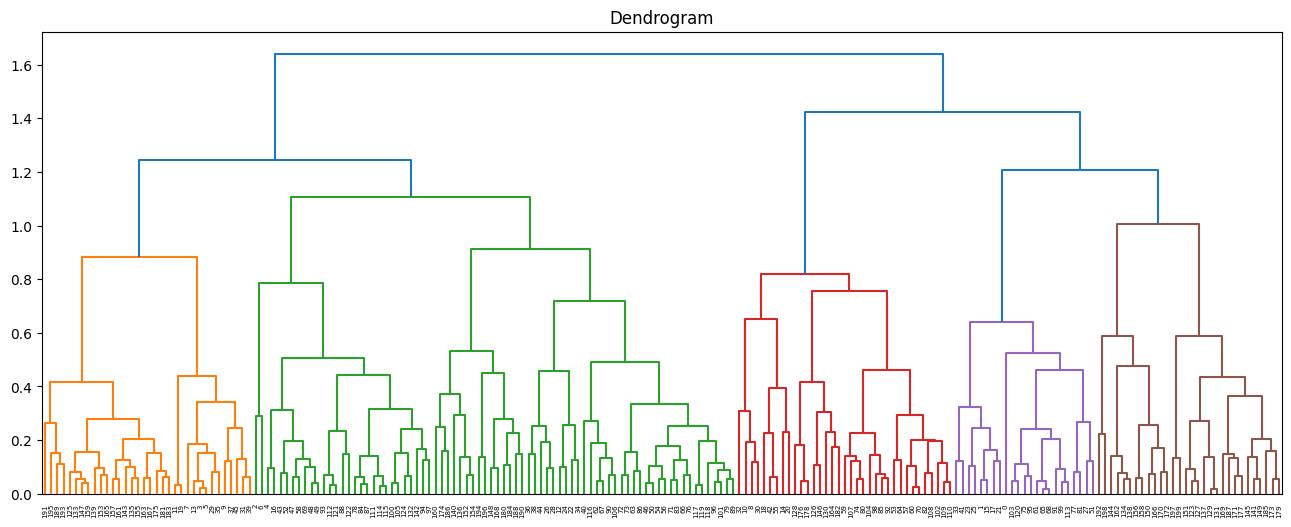

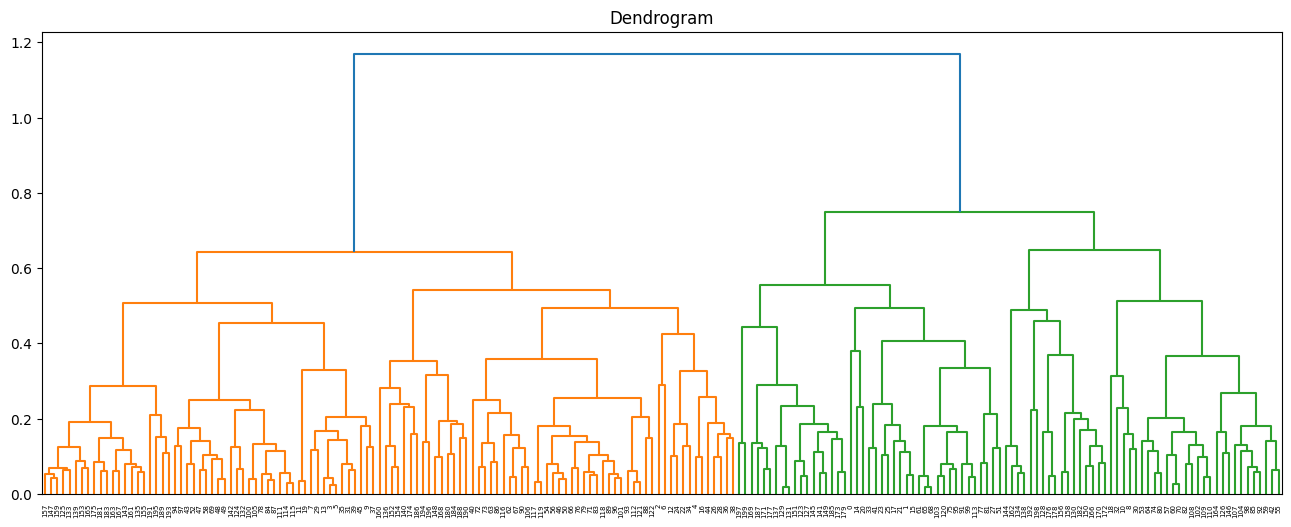

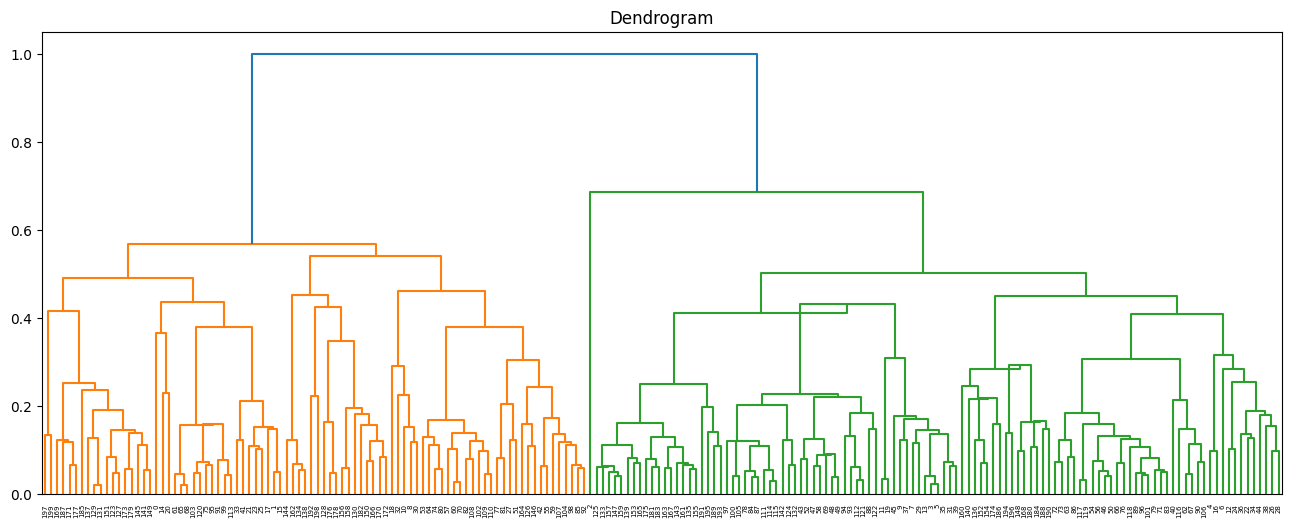

In [5]:
h = hc()
h.fit(new_customer_data,"ward","euclidean")
linkages = h.linkages()
h.dendogram()
h.fit(new_customer_data,"single","euclidean")
h.dendogram()
h.fit(new_customer_data,"complete","euclidean")
h.dendogram()
h.fit(new_customer_data,"average","euclidean")
h.dendogram()
h.fit(new_customer_data,"centroid","euclidean")
h.dendogram()

##### Varying Features

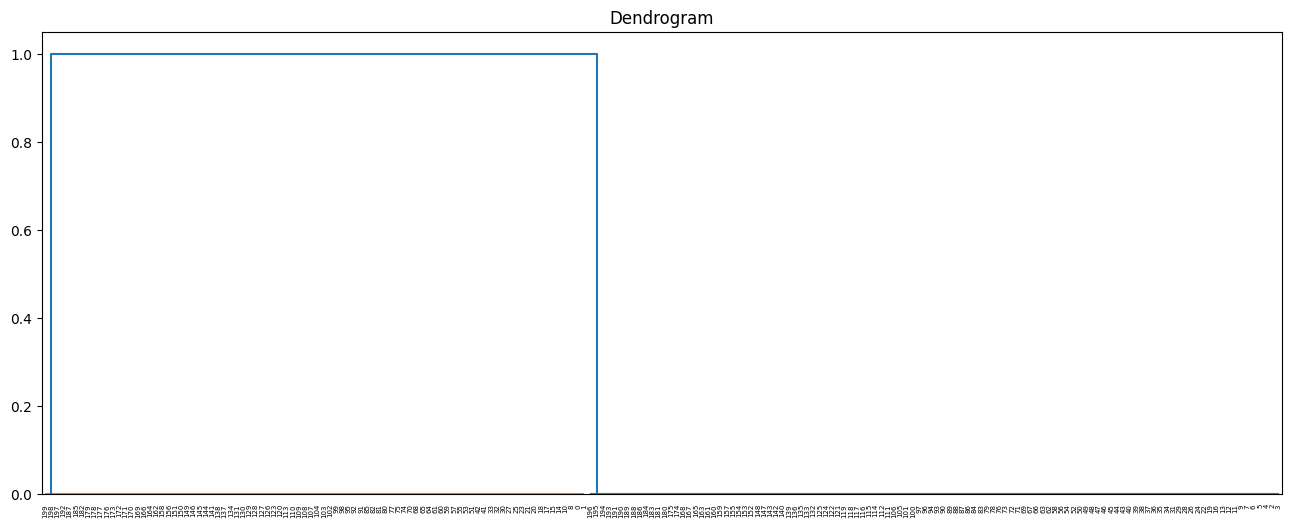

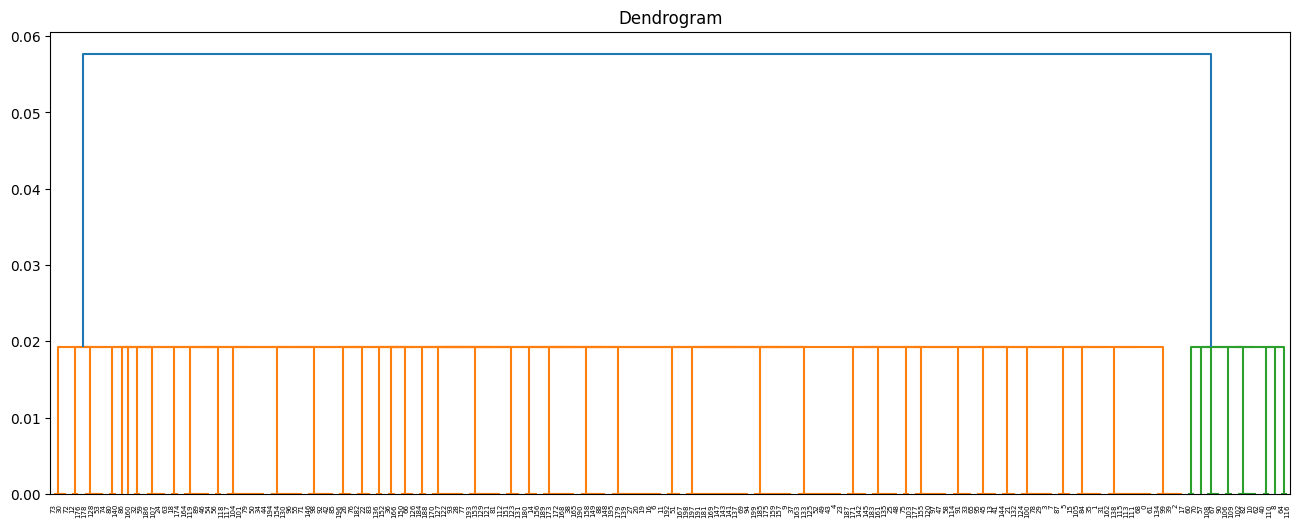

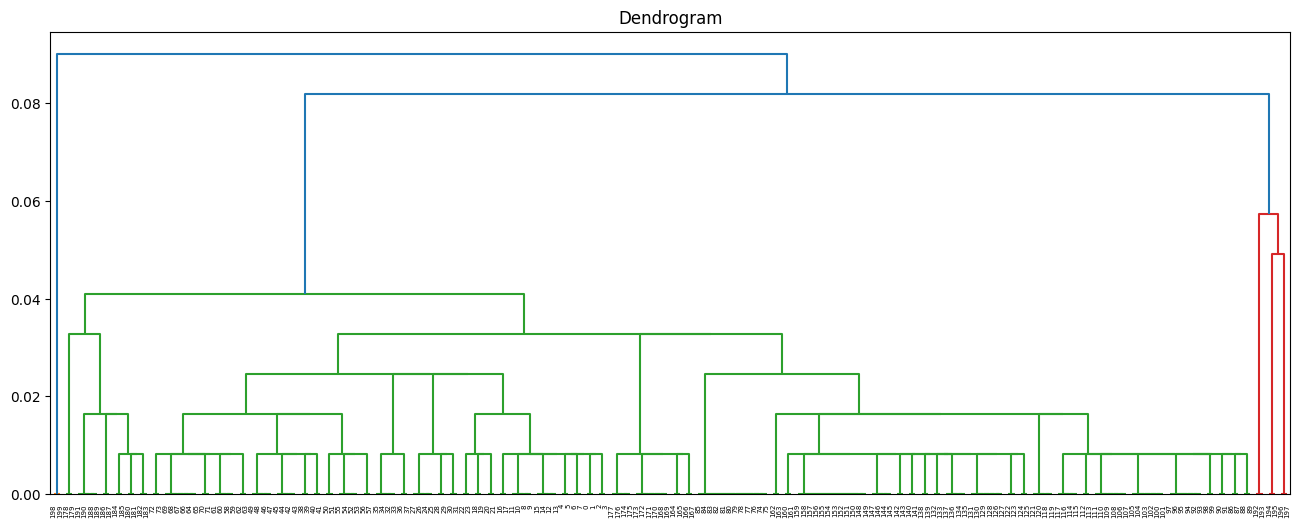

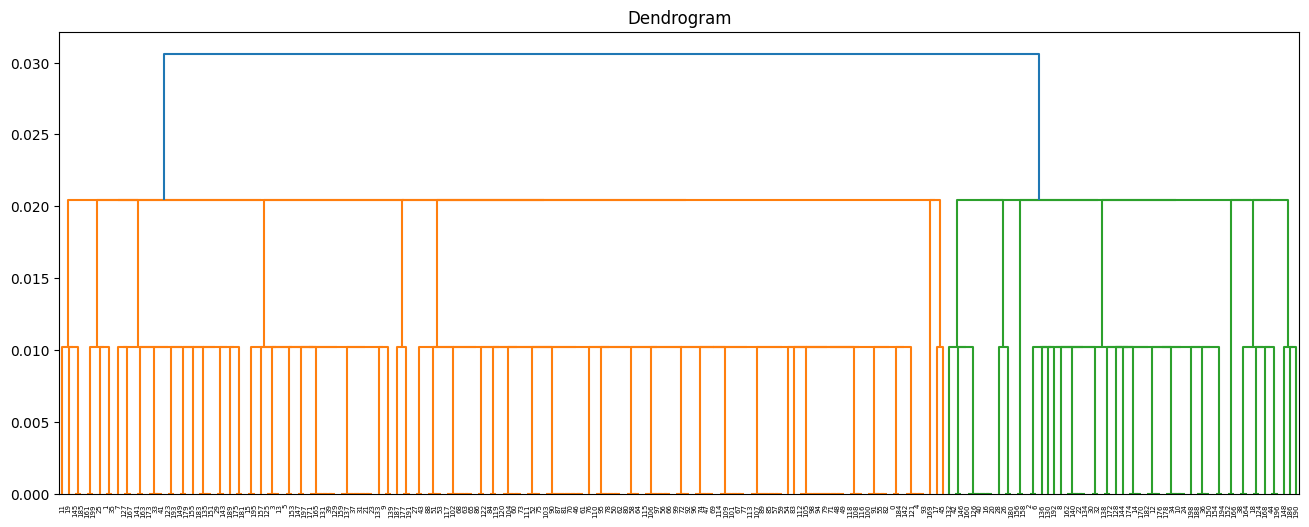

In [11]:
h = hc()

for i in range(new_customer_data.shape[1]):
    h.fit(new_customer_data[:,[i]],"single","euclidean")
    h.dendogram()

##### HIERARCHICAL CLUSTERING ON gene expression dataset

In [13]:
# Reading the data from the csv file
gene_data = pd.read_csv('SMAI-Dataset-gene-expression/gene.csv')
# Converting the data into an array
gene_data = np.array(gene_data)
# removing the first column as it is not required
gene_data = gene_data[:,1:]
# standardizing the data
mean = np.mean(gene_data,axis=0)
std = np.std(gene_data,axis=0)
gene_data = (gene_data-mean)/std

##### Varying Linkages

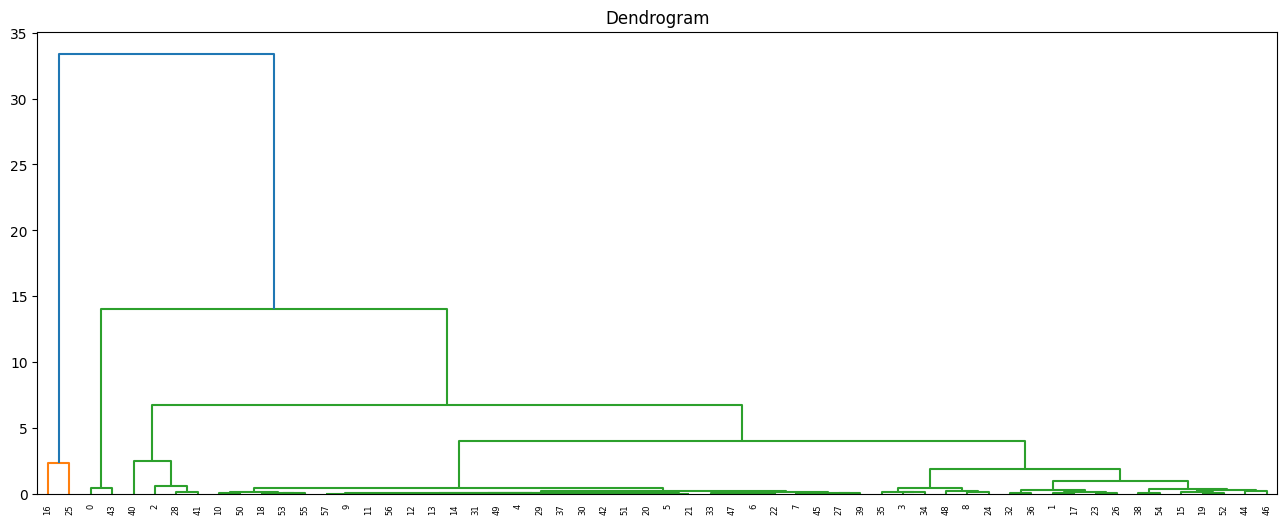

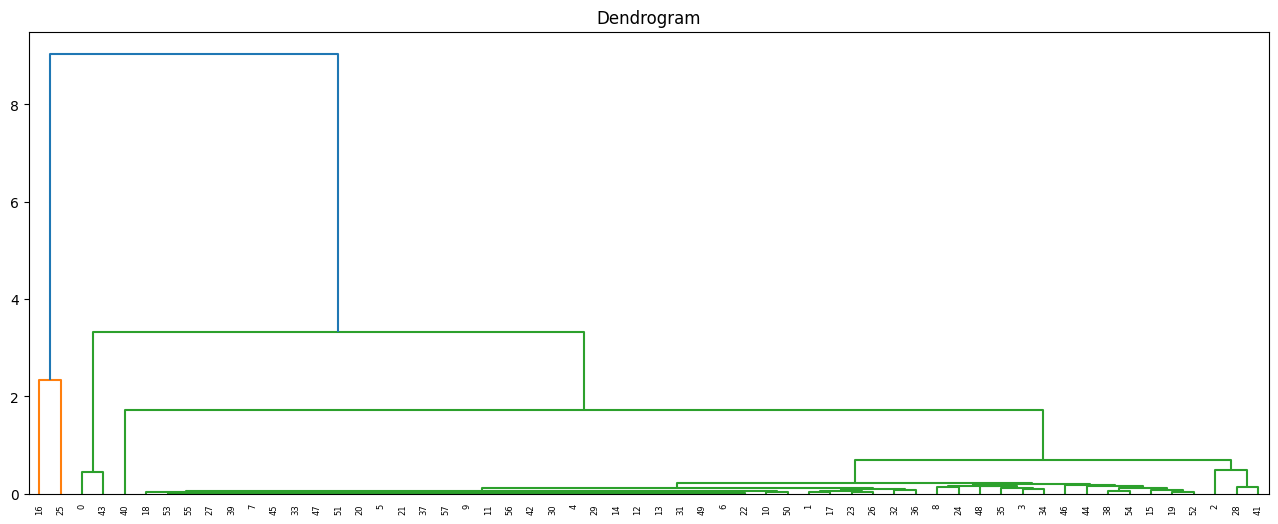

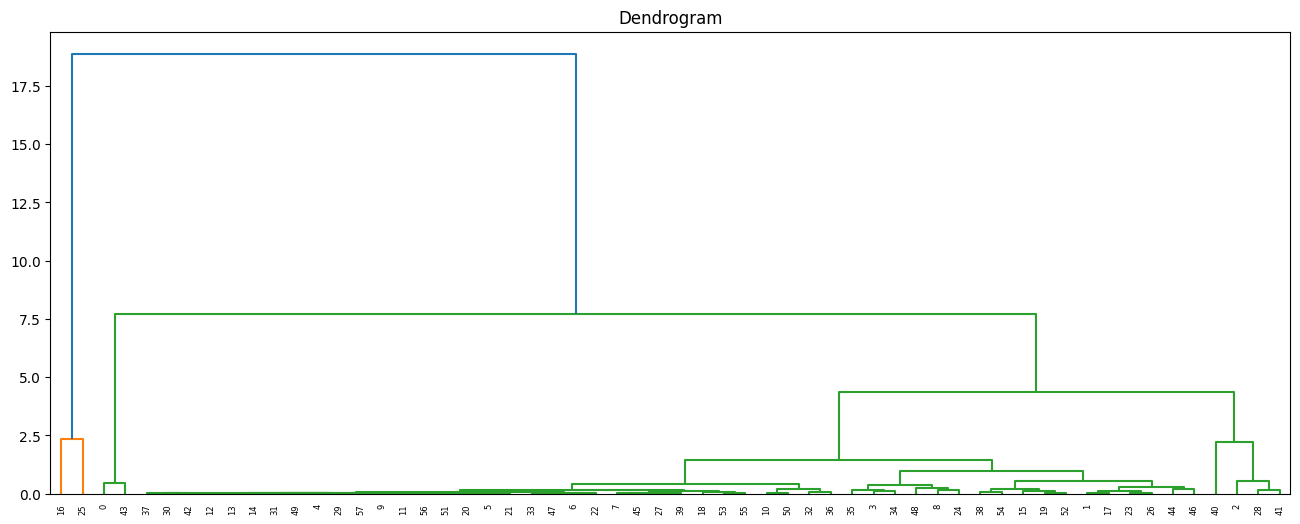

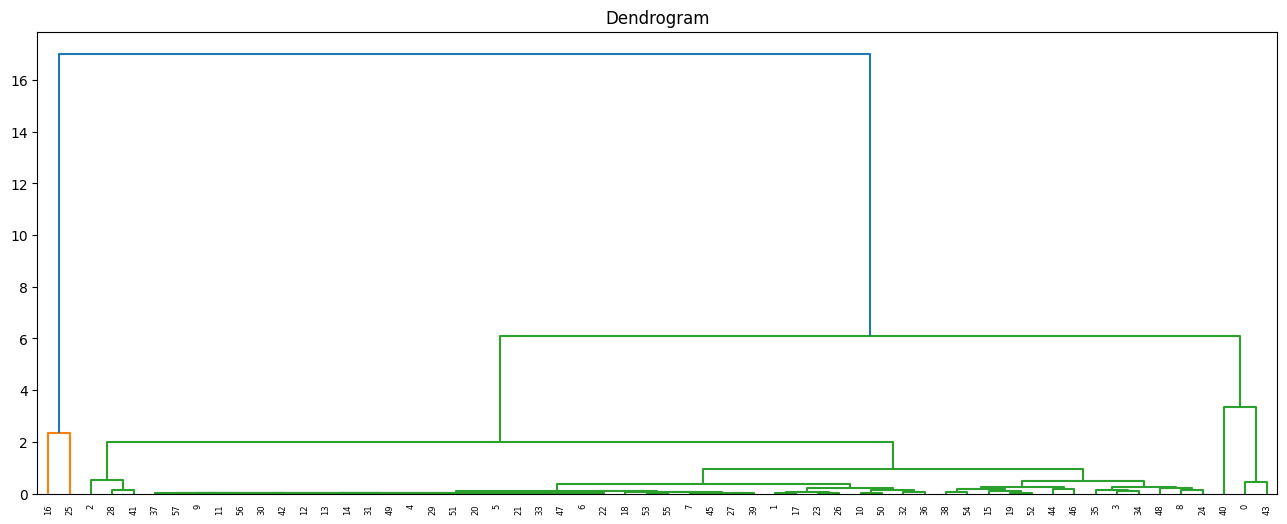

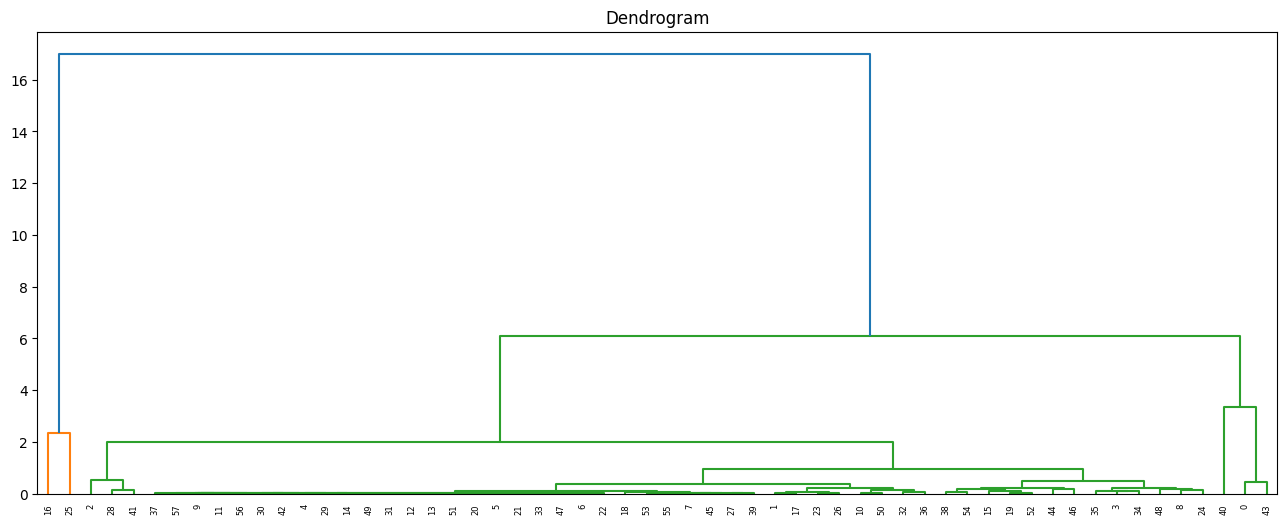

In [14]:
h1 = hc()
h1.fit(gene_data,"ward","euclidean")
h1.dendogram()
h1.fit(gene_data,"single","euclidean")
h1.dendogram()
h1.fit(gene_data,"complete","euclidean")
h1.dendogram()
h1.fit(gene_data,"average","euclidean")
h1.dendogram()
h1.fit(gene_data,"centroid","euclidean")
h1.dendogram()

##### Varying Features

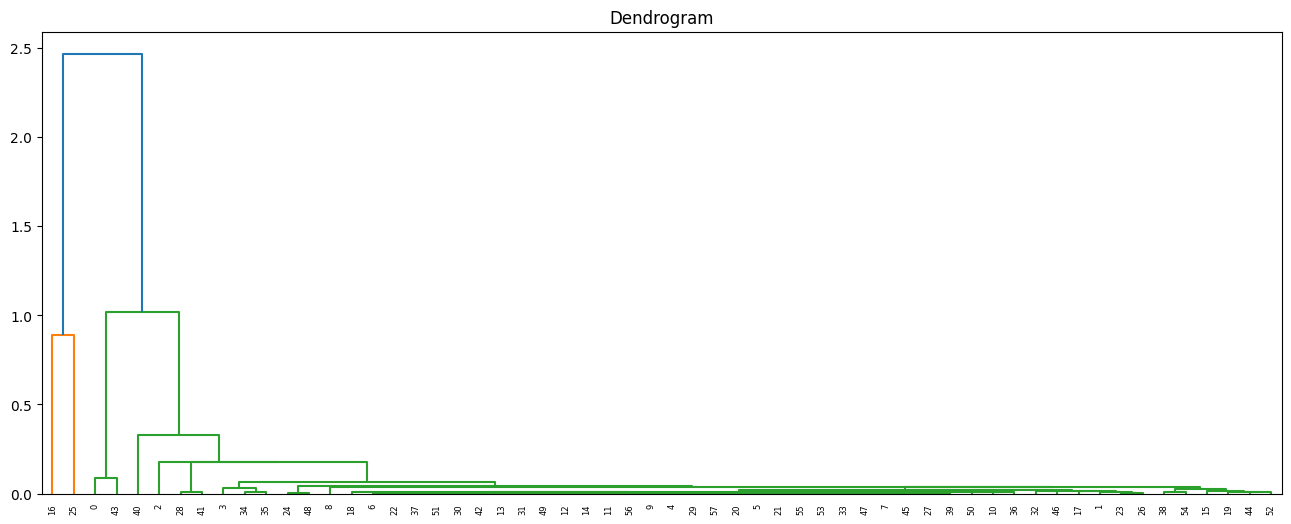

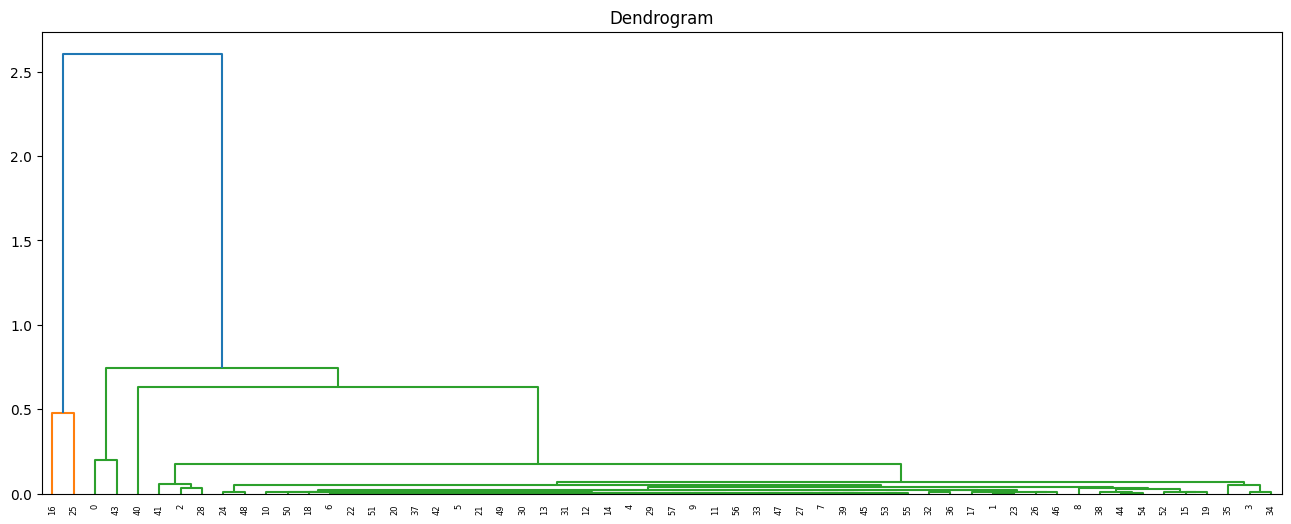

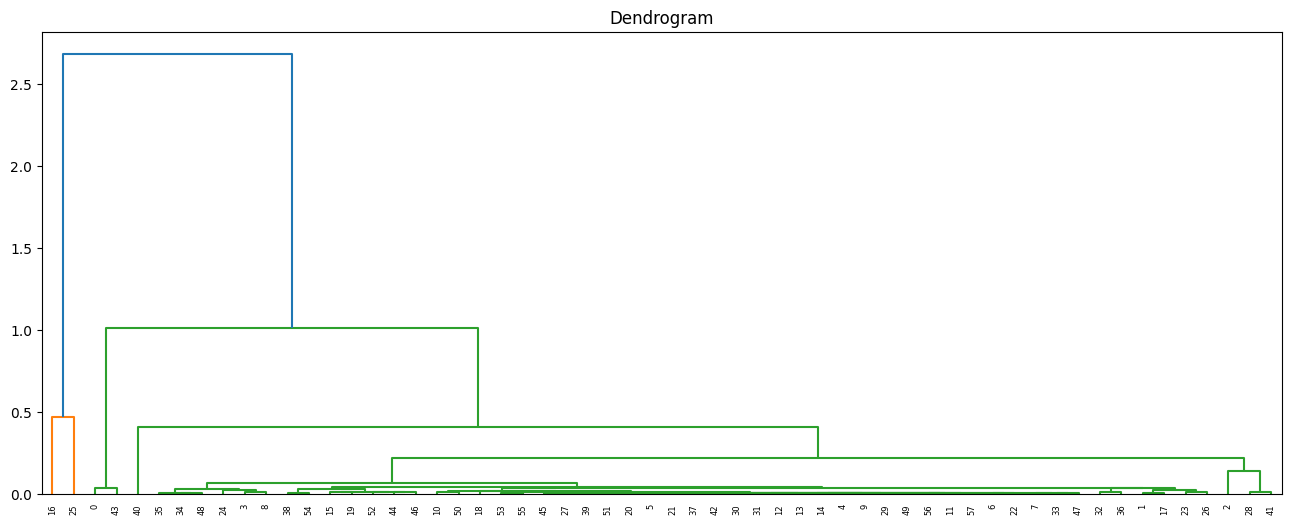

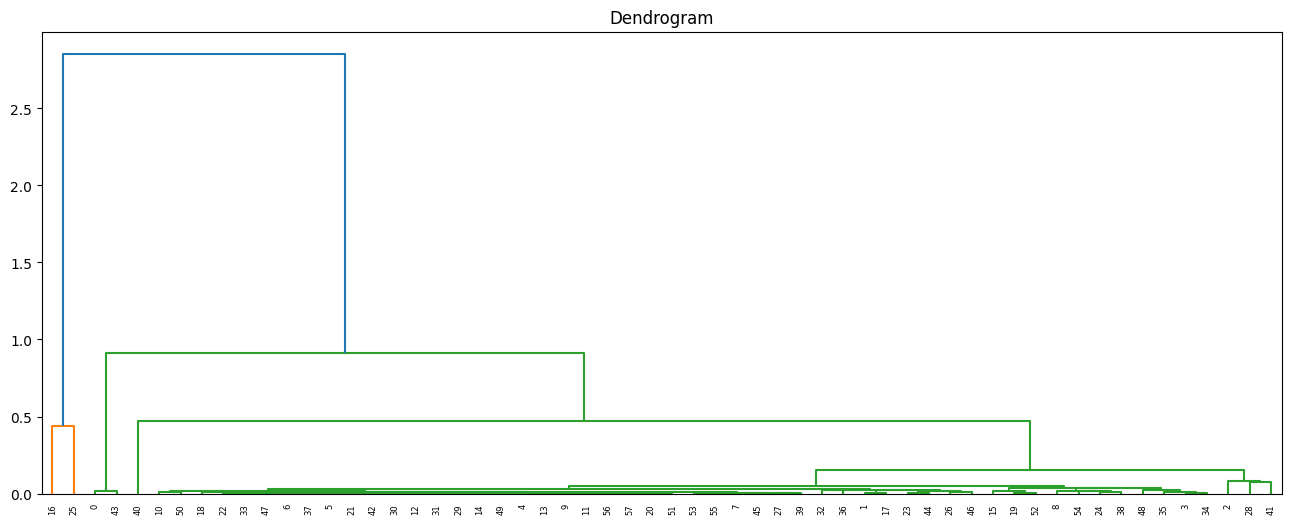

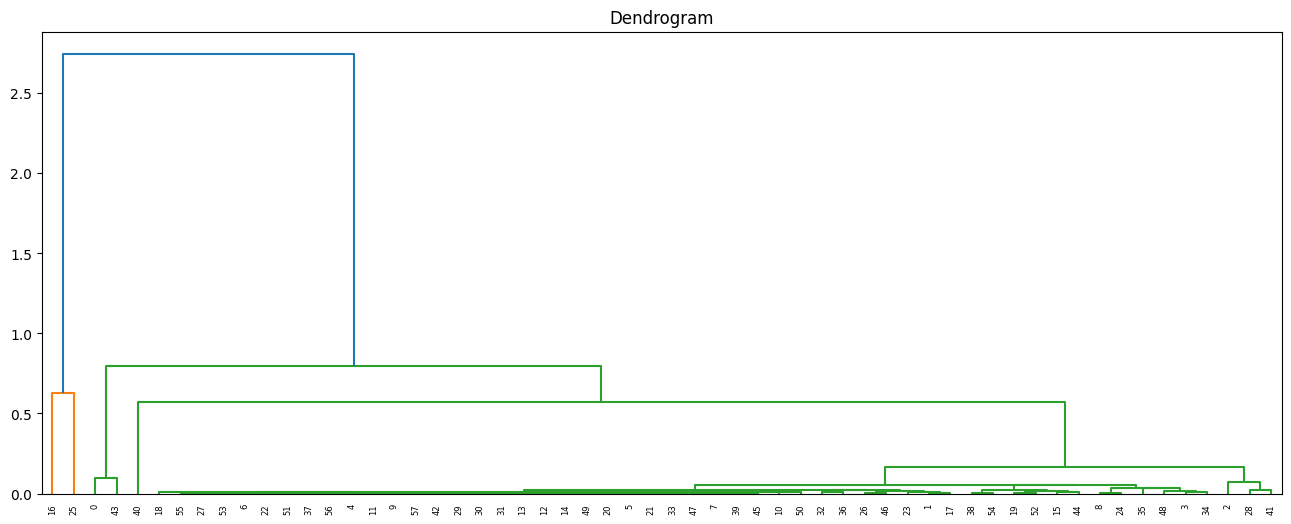

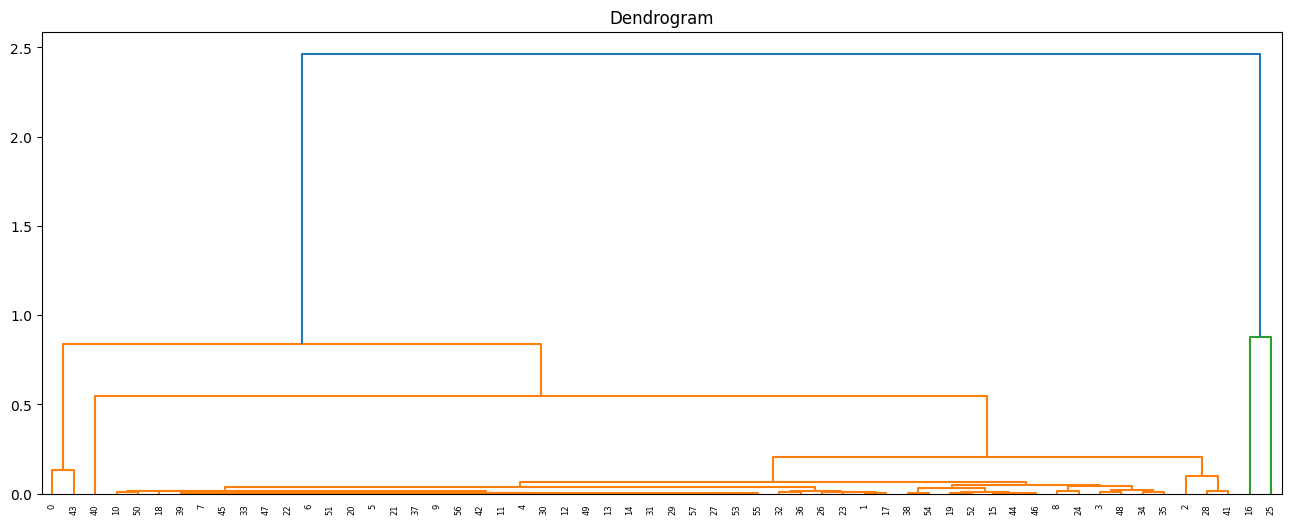

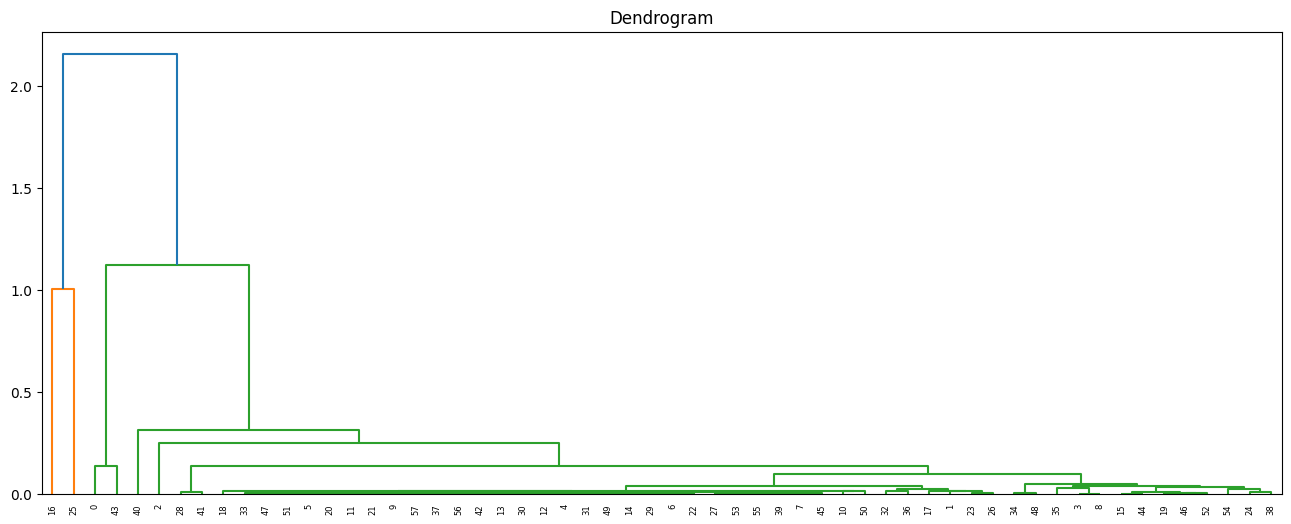

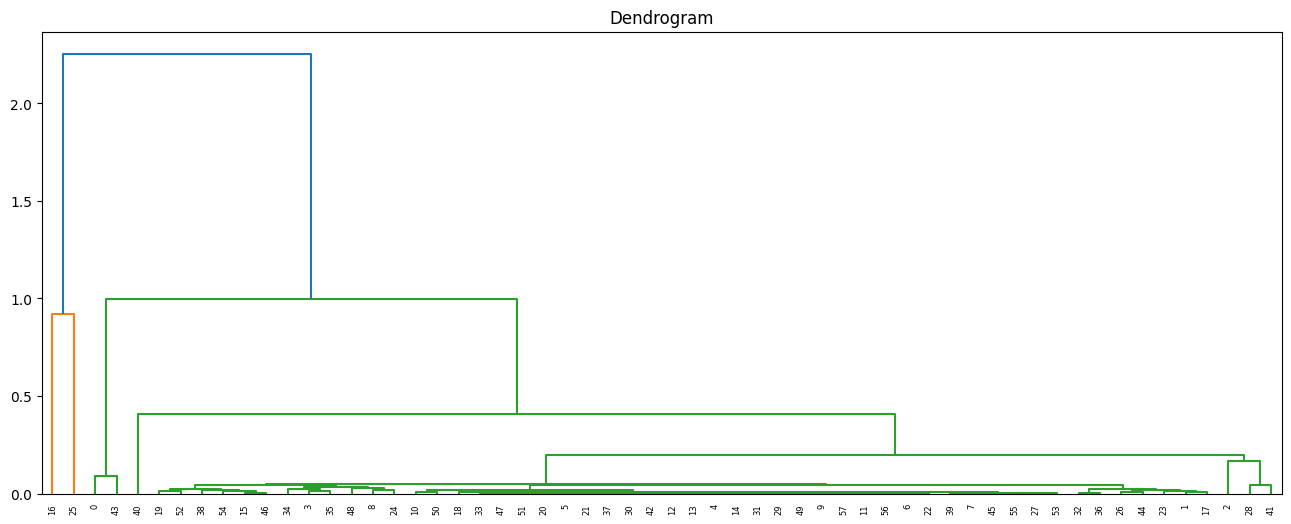

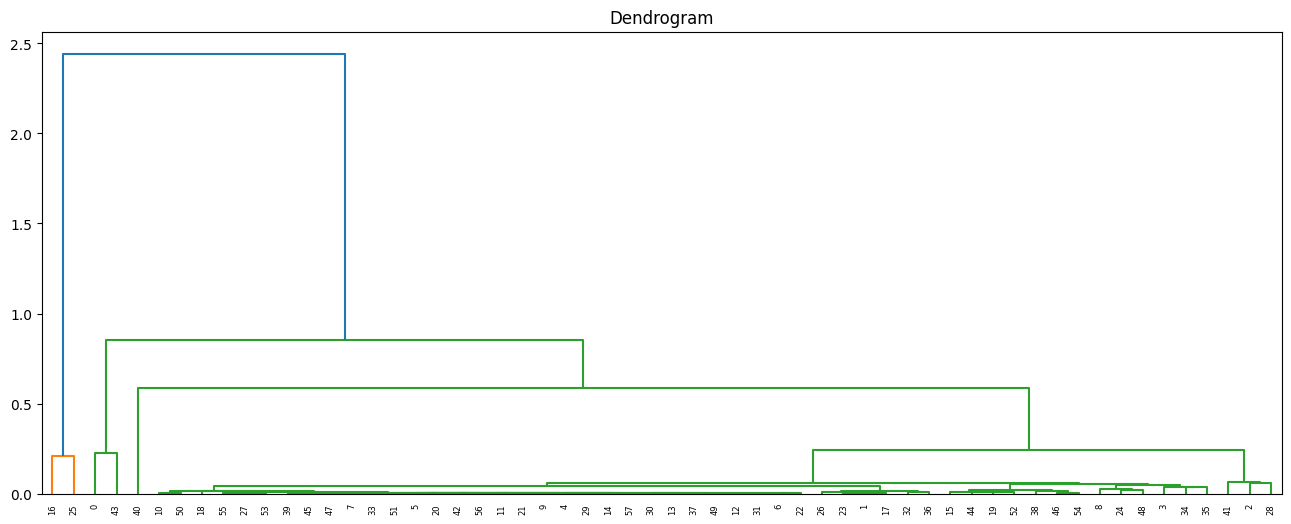

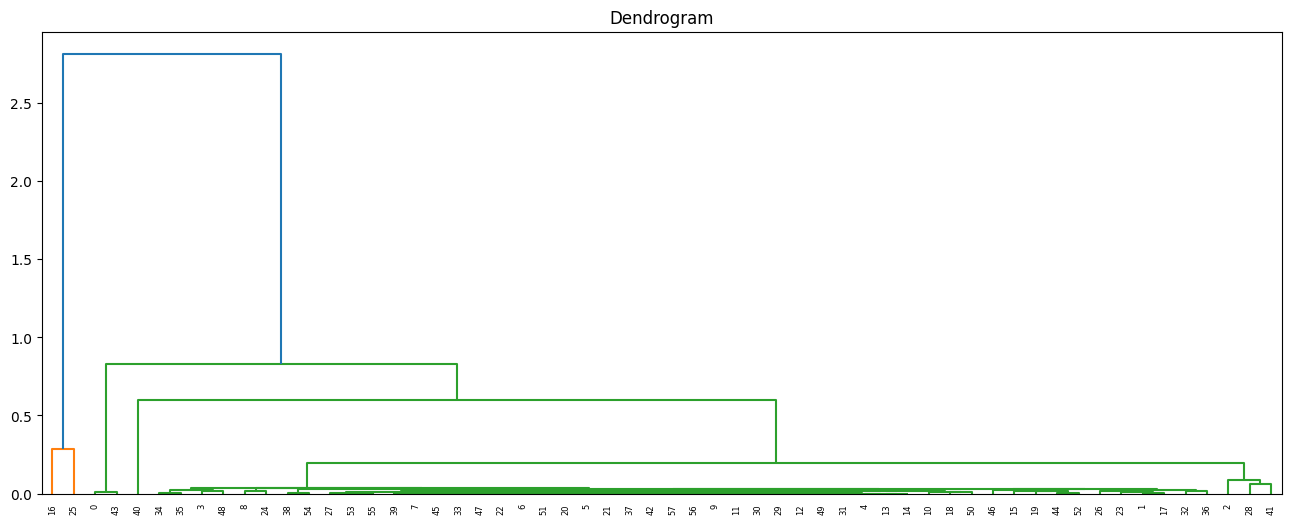

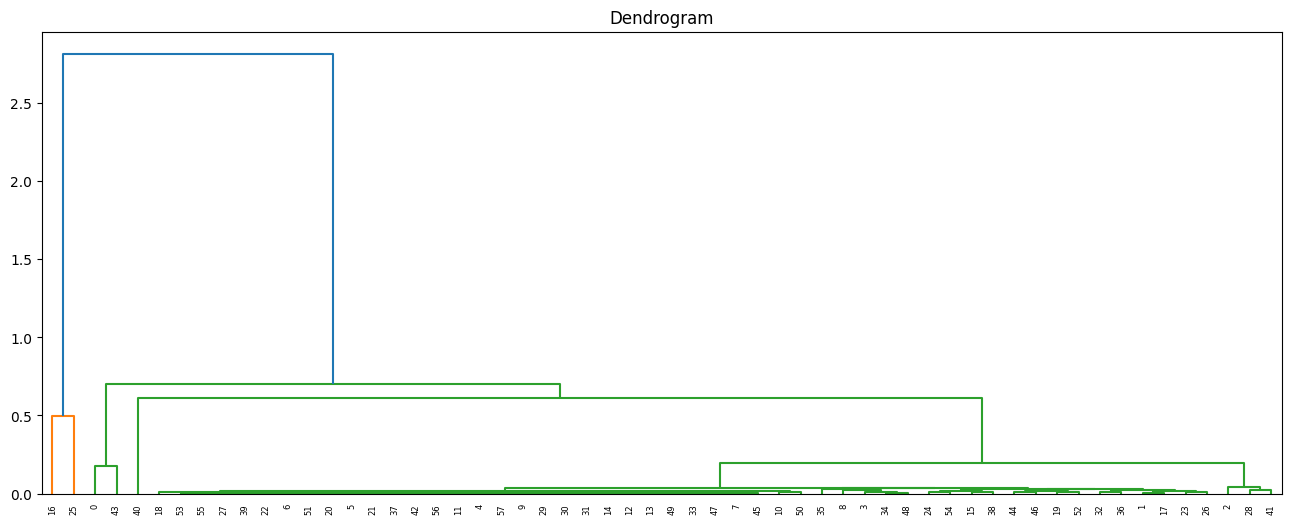

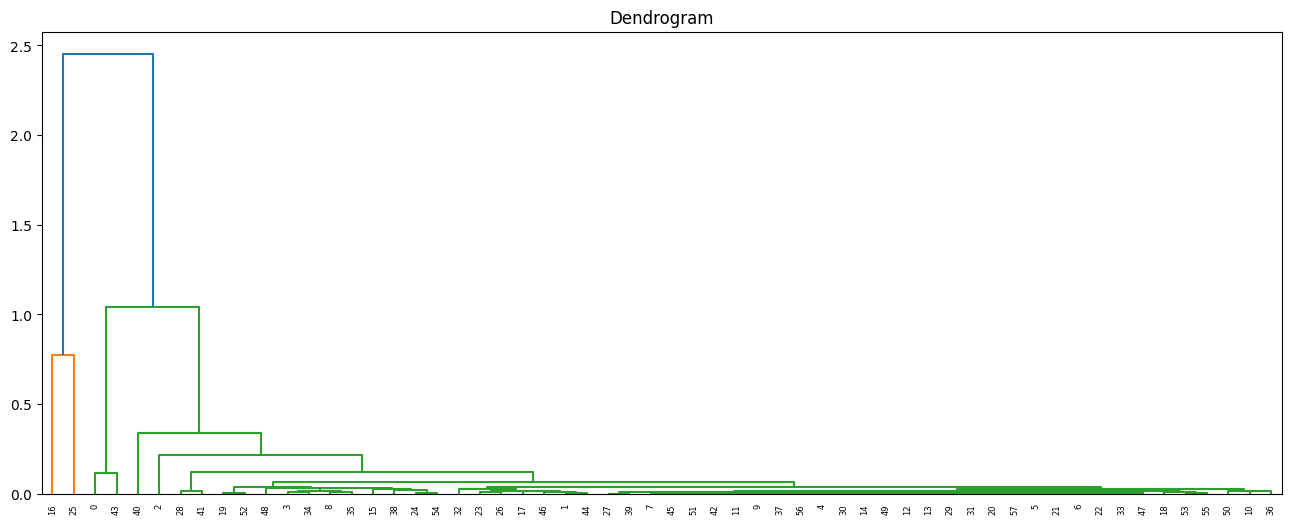

In [15]:
h = hc()

for i in range(gene_data.shape[1]):
    h.fit(gene_data[:,[i]],"single","euclidean")
    h.dendogram()

##### OBSERVATIONS
-  In single linkage, clusters are formed based on the closest distance between individual data points in different clusters. As a result, the dendrogram often has short branches and a large number of clusters. This indicates that the data points within each cluster are closely related.
- Complete linkage forms clusters based on the farthest distance between individual data points in different clusters. This approach tends to produce dendrograms with long branches but a smaller number of clusters. The longer branches imply a greater dissimilarity between the data points in different clusters.
- Average linkage calculates the average similarity between all pairs of data points in different clusters. This method leads to dendrograms with uniform branch lengths and a relatively large number of clusters. The balanced branch lengths suggest similar levels of relatedness among the data points in each cluster.
- Ward's linkage aims to minimize the variance of distances within clusters when merging them. This method typically results in dendrograms where the distances increase gradually as clusters merge. Ward's linkage often leads to more balanced and equally sized clusters compared to other methods